# Módulo 5 - Técnicas de Programação II | Python

## Projeto Final - História das Olimpíadas

Este projeto consiste em uma análise de dados históricos dos jogos olímpicos.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

## Metadados:

O arquivo ```athlete_events.csv``` contém 271116 linhas e 15 colunas. Cada linha corresponde a um indivíduo (atleta) que competiu em um evento olímpico individual. Veja a descrição das 15 colunas, a seguir:

- **ID:** Valor único para cada atleta
- **Name:** Nome do atleta
- **Sex:** Gênero do atleta (M para masculino e F para feminino)
- **Age:** Idade do atleta no momento da competição
- **Height:** Altura do atleta, em centímetros
- **Weight:** Peso do atleta, em kg
- **Team:** Nome do time
- **NOC:** National Olympic Committee (código de 3 letras)
- **Games:** Ano e temporada dos jogos
- **Year:** Ano dos jogos
- **Season:** Temporada dos jogos (summer para verão e winter para inverno)
- **City:** Cidade em que ocorreu os jogos
- **Sport:** Esporte praticado pelo atleta
- **Event:** Categoria/modalidade da competição
- **Medal:** Medalha adquirida: Gold (ouro), Silver (prata), Bronze ou NA

In [76]:
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./data/athlete_events.csv')

In [77]:
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [78]:
df.shape

(271116, 15)

## O Brasil nas olímpiadas

**1.** Crie um DataFrame contendo apenas informações sobre atletas **brasileiros**. Exiba a quantidade de linhas desse novo DataFrame.

In [79]:
df_bra = df[df["Team"] == "Brazil"].reset_index(drop=True)

In [80]:
df_bra

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,NaN
1,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,NaN
2,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
3,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,NaN
4,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,134400,"Maria Jos ""Zz"" Bertolotti",F,26.0,190.0,NaN,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,NaN
3768,134976,Sieglinda Lenk Zigler,F,17.0,NaN,NaN,Brazil,BRA,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Backstroke,NaN
3769,135037,Moacir Zimmermann,M,32.0,184.0,70.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,NaN
3770,135289,Zzimo Alves Calazans,M,20.0,NaN,NaN,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,NaN


In [81]:
df_bra2 = df_bra.groupby(["Medal"]).size().sum()
df_bra2

449

**2. Será que existe alguma correlação entre a altura do atleta e seu desempenho, para algum esporte? Faça essa análise separadamente para cada gênero, e conclua.**

Gere um ou mais gráficos de sua escolha, em que seja possível comparar as alturas dos atletas de cada esporte, separando-os por gênero. Se necessário, crie colunas ou DataFrames auxiliares.

**Facilitador:** se quiser, analise apenas os esportes em que se tenha ao menos 5 atletas medalhistas e 5 atletas não medalhistas, para facilitar visualizações e conclusões.

In [82]:
df_bra["Medal"].isnull().sum()

3323

In [83]:
df_bra["Medal2"] = df_bra["Medal"].map({"Silver" : 1, "Gold" : 1, "Bronze" : 1}).fillna(0)#.value_counts()

In [84]:
df_bra["Medal"] = df_bra["Medal"].fillna("Sem medalha")

In [85]:
df_bra

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Medal2
0,386,Alexandre Abeid,M,22.0,194.0,92.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Volleyball,Volleyball Men's Volleyball,Sem medalha,0.0
1,386,Alexandre Abeid,M,26.0,194.0,92.0,Brazil,BRA,1976 Summer,1976,Summer,Montreal,Volleyball,Volleyball Men's Volleyball,Sem medalha,0.0
2,388,Abel Carlos da Silva Braga,M,19.0,190.0,73.0,Brazil,BRA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,Sem medalha,0.0
3,451,Diana Monteiro Abla,F,21.0,175.0,75.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Water Polo,Water Polo Women's Water Polo,Sem medalha,0.0
4,565,Glauclio Serro Abreu,M,26.0,185.0,75.0,Brazil,BRA,2004 Summer,2004,Summer,Athina,Boxing,Boxing Men's Middleweight,Sem medalha,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,134400,"Maria Jos ""Zz"" Bertolotti",F,26.0,190.0,NaN,Brazil,BRA,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Sem medalha,0.0
3768,134976,Sieglinda Lenk Zigler,F,17.0,NaN,NaN,Brazil,BRA,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Women's 100 metres Backstroke,Sem medalha,0.0
3769,135037,Moacir Zimmermann,M,32.0,184.0,70.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Men's 20 kilometres Walk,Sem medalha,0.0
3770,135289,Zzimo Alves Calazans,M,20.0,NaN,NaN,Brazil,BRA,1952 Summer,1952,Summer,Helsinki,Football,Football Men's Football,Sem medalha,0.0


In [86]:
fig = px.scatter(x='Year', y='Height', data_frame=df_bra, title='Autura x ano', color='Sex', opacity=.3, 
                category_orders={'Sex':['M','F']}, hover_data=['Medal'], symbol='Medal', hover_name='Sport',
                 color_discrete_map={'M' : 'blue', 'F' : 'red'});
fig

**3. Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.**

Crie uma visualização de sua preferência para mostrar, por esporte, a proporção de medalhas de ouro, prata e bronze que nosso país já consquistou.

**Facilitador:** Se preferir, mostre as proporções apenas para os 6 esportes que tiveram mais medalhas.  

*DICA:* Cuidado! Esportes em equipe dão medalhas a todos os jogadores, mas só contabilizam uma vez!

In [87]:
df3 = df_bra[["Sport","Medal","Year","Event","Sex"]].drop_duplicates()


In [88]:
df4 = df3[df3["Medal"] != "Sem medalha"].groupby(["Medal", "Sport"], as_index=False).count()

In [89]:
df4.head()

,Medal,Sport,Year,Event,Sex
0,Bronze,Athletics,8,8,8
1,Bronze,Basketball,4,4,4
2,Bronze,Boxing,3,3,3
3,Bronze,Canoeing,1,1,1
4,Bronze,Equestrianism,2,2,2


In [144]:
px.bar(data_frame=df4, x='Sport', y='Event', color="Medal", barmode='group',
       color_discrete_map={'Bronze' : '#cd7f32', 'Gold' : 'gold', 'Silver' : 'silver'})

**4. Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras.**

Crie um gráfico de sua escolha, que mostre o total de medalhas de ouro, prata e bronze, por edição da olimpíada (em ordem cronológica). 

*DICA:* Mais uma vez, tome cuidado com os esportes em grupo - os contabilize apenas uma vez!

In [110]:
df6 = df3[df3["Medal"] != "Sem medalha"].groupby(["Year", "Medal"], as_index=False).count()
df6.head()

,Year,Medal,Sport,Event,Sex
0,1920,Bronze,1,1,1
1,1920,Gold,1,1,1
2,1920,Silver,1,1,1
3,1948,Bronze,1,1,1
4,1952,Bronze,2,2,2


In [92]:
fig = px.line(data_frame=df6, x='Year', y='Event', color='Medal', title='Quantidade de medalhas por ano',
             line_dash='Medal',color_discrete_map={ 'Gold' : '#FFD700','Bronze' : '#cd7f32', 'Silver' : '#C0C0C0'})
fig.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 1)',
                    'paper_bgcolor': 'rgba(255, 255, 255, 1)'})
fig.show()

**5. Agora é com vocês!** 

Escolha uma análise visual que julga interessante de fazer neste conjunto de dados, faça o(s) gráficos(s) necessários e comente os resultados. 

In [129]:
df["Medal"] = df["Medal"].fillna("Sem medalha")

In [130]:
df_total = df[["Sport","Medal","Year","Event","Sex"]].drop_duplicates()

In [131]:
df_total = df_total[df_total["Medal"] != "Sem medalha"].groupby(["Medal", "Year"], as_index=False).count()

In [132]:
df_total.head(10)

,Medal,Year,Sport,Event,Sex
0,Bronze,1896,32,32,32
1,Bronze,1900,81,81,81
2,Bronze,1904,88,88,88
3,Bronze,1906,72,72,72
4,Bronze,1908,98,98,98
5,Bronze,1912,102,102,102
6,Bronze,1920,140,140,140
7,Bronze,1924,146,146,146
8,Bronze,1928,134,134,134
9,Bronze,1932,135,135,135


In [133]:
df_bra_soma = df_bra[["Sport","Medal","Year","Event","Sex"]].drop_duplicates()

In [134]:
df_bra_soma = df_bra_soma[df_bra_soma["Medal"] != "Sem medalha"].groupby(["Medal", "Year"], as_index=False).count()

In [135]:
df_bra_soma.head(10)

,Medal,Year,Sport,Event,Sex
0,Bronze,1920,1,1,1
1,Bronze,1948,1,1,1
2,Bronze,1952,2,2,2
3,Bronze,1960,2,2,2
4,Bronze,1964,1,1,1
5,Bronze,1968,2,2,2
6,Bronze,1972,2,2,2
7,Bronze,1976,2,2,2
8,Bronze,1980,2,2,2
9,Bronze,1984,2,2,2


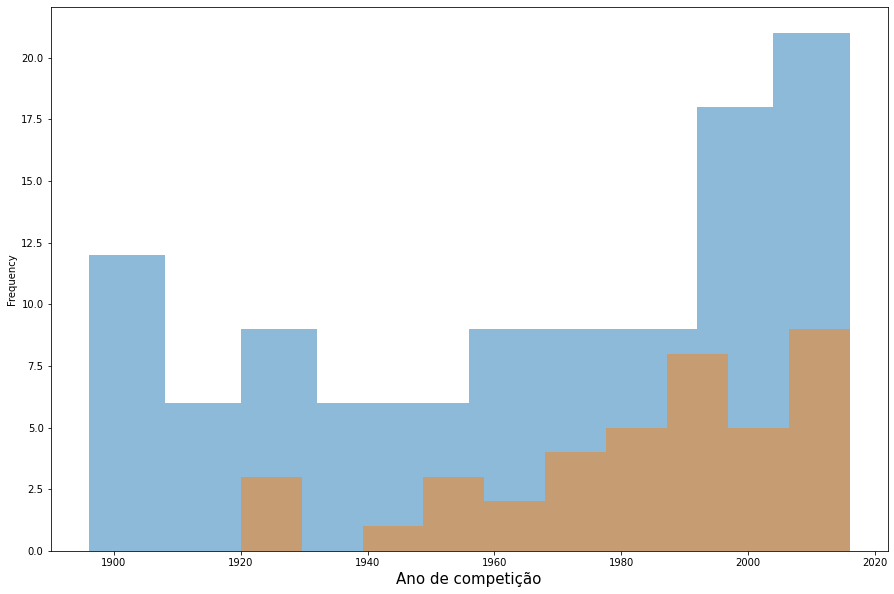

In [142]:
ax_hist = df_total['Year'].plot(y='Sport', kind='hist', bins=10, figsize=(15,10), alpha=.5, label='total de medalha')
ax_hist2 = df_bra_soma['Year'].plot(y='Sport', kind='hist', bins=10, figsize=(15,10), alpha=.5, 
                                    ax=ax_hist, label='Brasil' )
ax_hist.set_xlabel('Ano de competição', fontsize=15);